# Regressão Logística Multinomial

Para esta atividade usaremos um conjunto de dados sobre métricas do coração de pacientes, com o objetivo de determinar se o paciente é normal, suspeito ou com doença patológica. O conjunto de dado pode ser encontrado no [GitHub](https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv) de alguns usuários.

Abaixo encontra-se o dicionário de dados:

* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* NSP: Normal=0; Suspect=1; Pathologic=2


O objetivo é entender/prever a variável `NSP` em função das demais.

Obs: Não se preocupe se não entender o significado de cada variável, estamos lidando com um problema técnico e provavelmente você não terá um especialista na área e nem tempo suficiente para entender sobre a área de negócio para este exercício. Foque na construção do modelo de regressão logística.

## Atividade 1: Importe o conjunto de dados, verifique se há dados faltantes e a correlação entre as variáveis.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [32]:
# Carregando os dados novamente
df = pd.read_excel('cardio.xlsx')

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [33]:
# Verificando a presença de valores ausentes
missing_values = df.isnull().sum()

missing_values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

## Atividade 2: Verifique se a variável está balanceada.

In [34]:
# Verificando o balanceamento da variável 'fraude'
class_balance = df['NSP'].value_counts()

class_balance

0    1655
1     295
2     176
Name: NSP, dtype: int64

## Atividade 3: Use as variáveis que achar relevante e separe as variáveis em $X$ e $y$, a seguir crie um modelo de regressão logística.

In [35]:
# separando as variáveis dependente e independente
X = df.drop('NSP', axis=1)
y = df['NSP']

In [38]:
# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [39]:
class_balance = y.value_counts()

class_balance

1    295
0    176
2    176
Name: NSP, dtype: int64

In [40]:
# importando o statsmodels para criar o modelo de regressão logística
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

In [41]:
# Assim como na regressão linear, temos que adicionar uma constante à variável X.
X = sm.add_constant(X)

In [42]:
# criando modelo de regressão logística
modelo = MNLogit(y, X).fit()

         Current function value: 0.330210
         Iterations: 35


In [43]:
modelo.predict(X)

,0,1,2
0,9.811417e-01,1.885455e-02,3.725493e-06
1,9.960094e-01,3.990261e-03,3.222588e-07
2,9.999725e-01,2.746350e-05,1.193099e-08
3,5.560369e-01,4.429378e-01,1.025273e-03
4,5.287144e-01,4.712510e-01,3.459700e-05
...,...,...,...
642,3.515210e-05,5.250005e-06,9.999596e-01
643,8.115940e-06,3.819505e-07,9.999915e-01
644,7.810381e-05,1.133476e-05,9.999106e-01
645,3.299058e-04,2.344397e-05,9.996467e-01


In [44]:
y_pred = modelo.predict(X).idxmax(axis=1)

In [45]:
print(modelo.summary())

                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                  647
Model:                        MNLogit   Df Residuals:                      603
Method:                           MLE   Df Model:                           42
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.6903
Time:                        21:07:20   Log-Likelihood:                -213.65
converged:                      False   LL-Null:                       -689.94
Covariance Type:            nonrobust   LLR p-value:                2.178e-172
     NSP=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7837      3.027     -5.545      0.000     -22.716     -10.851
LB            -0.0948      0.054     -1.744      0.081      -0.201       0.012
AC         -1026.0427    171.079     -5.997      0.0

## Atividade 4: Faça previsões e avalie o modelo.

In [46]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[152,  22,   2],
       [  8, 269,  18],
       [  3,  24, 149]])

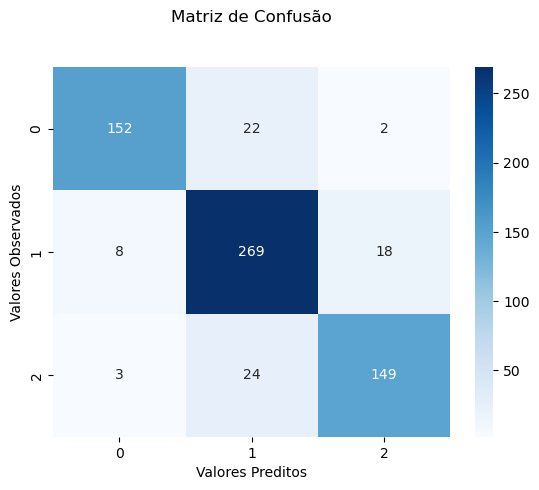

In [47]:
# criando mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

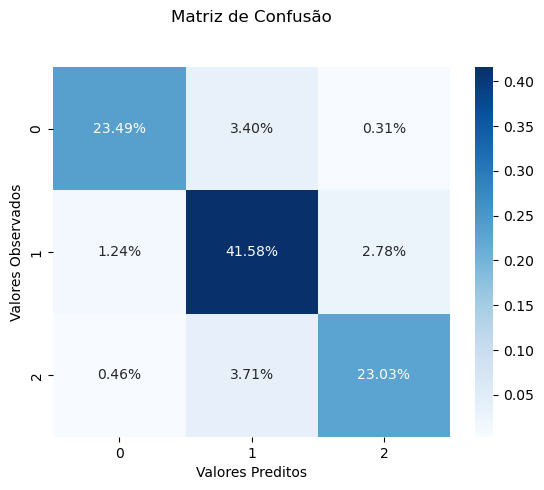

In [48]:
import numpy as np

sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       176
           1       0.85      0.91      0.88       295
           2       0.88      0.85      0.86       176

    accuracy                           0.88       647
   macro avg       0.89      0.87      0.88       647
weighted avg       0.88      0.88      0.88       647



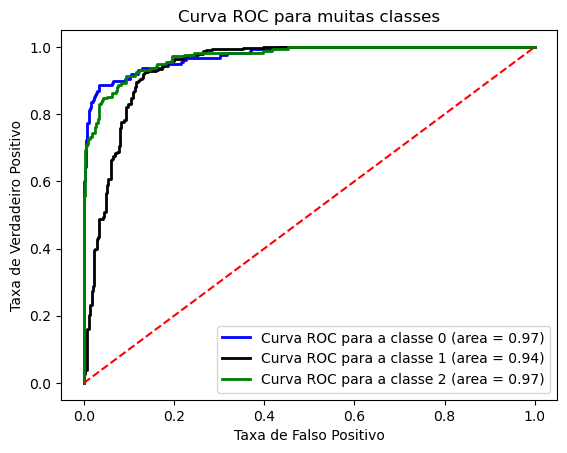

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_cat = label_binarize(y, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue','black','green','yellow']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], modelo.predict(X).iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC para a classe {i} (area = {round(roc_auc[i], 2)})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para muitas classes')
plt.legend(loc="lower right");

## Atividade 5: Faça a previsão para um paciente que apresenta as seguintes características:

* `LB` = 121
* `AC` = 0.004176
* `FM` = 0.0
* `UC` = 0.007541
* `DL` = 0.003176
* `DS` = 0.0
* `DP` = 0.0
* `ASTV` = 20
* `mSTV` = 2.3
* `ALTV` = 0
* `mLTV` = 11.5
* `Width` = 129
* `Min` = 54
* `Max` = 171
* `Nmax` = 5
* `Nzeros` = 0
* `Mode` = 140
* `Mean` = 136
* `Median` = 123
* `Variance` = 14
* `Tendency` = 1

In [51]:
new_patient = pd.DataFrame({
    'const': [1],
    'LB': [121],
    'AC': [0.004176],
    'FM': [0.0],
    'UC': [0.007541],
    'DL': [0.003176],
    'DS': [0.0],
    'DP': [0.0],
    'ASTV': [20],
    'mSTV': [2.3],
    'ALTV': [0],
    'mLTV': [11.5],
    'Width': [129],
    'Min': [54],
    'Max': [171],
    'Nmax': [5],
    'Nzeros': [0],
    'Mode': [140],
    'Mean': [136],
    'Median': [123],
    'Variance': [14],
    'Tendency': [1]
})

new_patient

,const,LB,AC,FM,UC,DL,DS,DP,ASTV,mSTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,1,121,0.004176,0.0,0.007541,0.003176,0.0,0.0,20,2.3,...,129,54,171,5,0,140,136,123,14,1


In [54]:
prediction = modelo.predict(new_patient)

predicted_class = prediction.idxmax(axis=1)

print("A classe prevista para o paciente é: ", predicted_class[0])

A classe prevista para o paciente é:  0
